<a href="https://colab.research.google.com/github/Awangnugrawan/Article-recomendation-and-Review/blob/main/Article_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBMISSION PROJECT DICODING Proyek Akhir : Membuat Model Sistem Rekomendasi

## DATA DIRI

*  Nama= Awang Mulya Nugrawan
*  username DICODING= awang_nugrawan
*  email = awangmulyanugrawan@gmail.com
*  No.hp = 082191862002
*  Asal= Makassar, Sulawesi Selatan
*  Status = Mahasiswa Sisfor Universitas Hasanuddin











#LIBRARY

In [ ]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#EXPLARATORY DATA ANALYSIS

Dataset yang digunakan pada laporan ini berisi informasi tentang aktivitas pengguna dalam berbagi dan membaca artikel. Data ini diambil dari Deskdrop, sebuah platform internal  untuk berbagi artikel bagi tim CI&T. Dataset ini berisi informasi tentang pengguna, artikel yang dibagikan dan dibaca, dan waktu aktivitas. Ini dapat digunakan untuk membuat sistem  rekomendasi artikel yang memberikan rekomendasi artikel berdasarkan preferensi pengguna dan perilaku sebelumnya.Dataset ini terdiri dari dua file csv yaitu Shared_articles dan Users_interactions
[Kaggle Repository](https://www.kaggle.com/datasets/gspmoreira/articles-sharing-reading-from-cit-deskdrop)


##**Shared_articles**

Berisi informasi tentang artikel yang dibagikan di platform. Setiap artikel memiliki tanggal berbagi (stempel waktu), url asli, judul, konten dalam teks biasa, bahasa artikel (Portugis: pt atau Inggris: en), dan informasi tentang pengguna yang membagikan artikel (penulis).

In [ ]:
df_article=pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/shared_articles.csv')

In [ ]:
df_article.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


Variabel- variable pada SHARED_ARTICLES KAGGLE DATASET:
1. "timestamp"  memuat waktu pada saat suatu event terjadi, dan format UNIX timestamp digunakan untuk merepresentasikannya.
2. "EventType" adalah variabel yang mencatat jenis aktivitas yang terjadi dalam sistem ada dua jenis aktivitas yang tercatat, yaitu "CONTENT SHARED" dan "CONTENT REMOVED".
3. "contentId" adalah identifikasi unik untuk suatu konten, seperti ID artikel.
4. "authorPersonId" adalah identifikasi unik untuk penulis suatu konten.
5. "authorSessionId" adalah identifikasi unik untuk sesi penulis pada saat event terjadi.
6. "authorUserAgent" adalah informasi mengenai perangkat atau browser yang digunakan oleh penulis saat event terjadi.
7. "authorRegion" adalah informasi mengenai wilayah geografis penulis.
8. "authorCountry" adalah informasi mengenai negara tempat tinggal penulis.
9. "contentType" menjelaskan jenis konten, seperti HTML, VIDEO, dan RICH.
10. "url" adalah URL untuk konten.
11. "title" adalah judul konten.
12. "text" adalah teks dari konten.
13. "lan" adalah informasi mengenai bahasa konten.

In [ ]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [ ]:
df_article['eventType'].value_counts()

CONTENT SHARED     3047
CONTENT REMOVED      75
Name: eventType, dtype: int64


CONTENT SHARED : Artikel telah dibagikan di platform dan tersedia untuk pengguna. \
CONTENT REMOVED: Artikel telah dihapus dari platform dan tidak tersedia untuk rekomendasi lebih lanjut. \

Untuk mempermudah prediksi kita hanya menggunakan 'CONTEN SHARED" karena artikelnya masih tersedia


In [ ]:
df_article = df_article[df_article['eventType'] == 'CONTENT SHARED']
df_article.head(5)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,CONTENT SHARED,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en


In [ ]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 1 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3047 non-null   int64 
 1   eventType        3047 non-null   object
 2   contentId        3047 non-null   int64 
 3   authorPersonId   3047 non-null   int64 
 4   authorSessionId  3047 non-null   int64 
 5   authorUserAgent  669 non-null    object
 6   authorRegion     669 non-null    object
 7   authorCountry    669 non-null    object
 8   contentType      3047 non-null   object
 9   url              3047 non-null   object
 10  title            3047 non-null   object
 11  text             3047 non-null   object
 12  lang             3047 non-null   object
dtypes: int64(4), object(9)
memory usage: 333.3+ KB


##Users_interactions

Menyimpan informasi tentang interaksi pengguna dengan konten. Setiap baris dalam file ini mewakili sebuah interaksi, dan setiap kolom mewakili sebuah atribut dari interaksi tersebut. 


In [ ]:
df_interaction= pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/users_interactions.csv')
df_interaction.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


Variabel- variable pada SHARED_ARTICLES KAGGLE DATASET:
1. "timestamp"  memuat waktu pada saat suatu event terjadi, dan format UNIX timestamp digunakan untuk merepresentasikannya.
2. "eventType" adalah variabel yang mencatat jenis aktivitas yang terjadi dalam 
sistem ada beberapa jenis aktivitas seperti VIEW, LIKE, COMMENT CREATED, DLL
3. "contentId" adalah identifikasi unik untuk suatu konten, seperti ID artikel.
4. "personId" merupakan identitas unik dari setiap pengguna. Variabel ini digunakan untuk mengidentifikasi setiap pengguna secara individual.
5. "sessionId" adalah identitas unik dari sesi aktivitas pengguna. Variabel ini digunakan untuk mengidentifikasi interaksi pengguna yang terkait dengan sesi tertentu.
6. "userAgent" menyimpan informasi tentang perangkat dan browser yang digunakan oleh pengguna saat melakukan interaksi. Informasi ini dapat berisi nama perangkat, sistem operasi, versi browser, dll.
7. "userRegion" menyimpan informasi tentang wilayah geografis dari pengguna. Ini dapat berisi informasi tentang negara atau provinsi dimana pengguna berada.
8. "userCountry" menyimpan informasi tentang negara dari pengguna. Ini digunakan untuk mengidentifikasi negara asal pengguna dan dapat digunakan untuk analisis demografis.

In [ ]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    72312 non-null  int64 
 1   eventType    72312 non-null  object
 2   contentId    72312 non-null  int64 
 3   personId     72312 non-null  int64 
 4   sessionId    72312 non-null  int64 
 5   userAgent    56918 non-null  object
 6   userRegion   56907 non-null  object
 7   userCountry  56918 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


#DATA PREPARATION

##Handling eventType "user_interaction"

Terdapat 5 jenis interaksi, selanjutnya adalah dengan memberikan bobot tergantung pada jenis interaksinya

Memmbuat dictionary untuk menampung masing-masing bobot eventType:
*   'COMMENT CREATED': 5
*   'FOLLOW': 4
*   'BOOKMARK': 3
*   'LIKE': 2
*   'VIEW': 1






In [ ]:
event_type_strength = {
    'COMMENT CREATED': 5,
   'FOLLOW': 4,
   'BOOKMARK': 3,
   'LIKE': 2,
   'VIEW': 1,  
}

df_interaction['eventWeight'] = df_interaction['eventType'].apply(lambda x: event_type_strength[x])

##Handling User cold-star

User cold-start adalah masalah yang sering dialami oleh sistem rekomendasi, di mana sulit untuk memberikan rekomendasi yang dipersonalisasi untuk pengguna yang tidak memiliki atau hanya memiliki sedikit item yang dikonsumsi. Hal ini disebabkan karena kurangnya informasi untuk memodelkan preferensi mereka.

Untuk mengatasi masalah ini, dataset hanya mempertahankan pengguna dengan setidaknya 7 interaksi, karena dengan begitu lebih banyak informasi tersedia untuk memodelkan preferensi pengguna dan memberikan rekomendasi yang lebih baik.

In [ ]:
#menghasilkan jumlah unik pengguna yang memiliki interaksi dengan konten.
users_interactions_count_df = df_interaction.groupby(['personId', 'contentId']).size().groupby('personId').size() 
print('Total Pengguna : %d' % len(users_interactions_count_df))   


#Dalam hal ini, kita menentukan jumlah interaksi minimum sebagai 7. Ini berarti bahwa kita hanya ingin mempertahankan pengguna yang memiliki setidaknya 7 interaksi
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 7].reset_index()[['personId']]
print('Jumlah pengguna dengan minimal 7 interaksi : %d' % len(users_with_enough_interactions_df))

Total Pengguna : 1895
Jumlah pengguna dengan minimal 7 interaksi : 947


In [ ]:
print('Total seluruh interaksi: %d' % len(df_interaction))
#fungsi merge untuk join , dengan metode penggabungan 'right'
interactions_from_selected_users_df = df_interaction.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'personId',
               right_on = 'personId')
print('Jumlah user yang memiliki minimal 7 interaksi : %d' % len(interactions_from_selected_users_df))

Total seluruh interaksi: 72312
Jumlah user yang memiliki minimal 7 interaksi : 68235


##Smooth_user_preference

Agar distribusi interaksi antara pengguna dan item tidak terlalu ekstrem atau tidak terlalu bias, maka dilakukan transformasi logaritma dengan mengaplikasikan fungsi "smooth_user_preference". Transformasi ini bertujuan untuk memperhalus distribusi interaksi dan membuatnya lebih stabil sehingga lebih mudah dianalisis dan diterapkan pada sistem rekomendasi.

In [ ]:
# Fungsi untuk memperhalus preferensi user
def smooth_user_preference(x):
    # Melakukan logaritma basis 2 pada 1 + x, untuk memperhalus distribusi
    return math.log(1+x, 2)
    
# Menghitung jumlah interaksi setiap user dan item
interactions_full_df = interactions_from_selected_users_df \
                    .groupby(['personId', 'contentId'])['eventWeight'].sum() \
                    .apply(smooth_user_preference).reset_index()

# Menghitung jumlah interaksi user dan item yang unik
print('Jumlah interaksi user dan item yang unik: %d' % len(interactions_full_df))



Jumlah interaksi user dan item yang unik: 38047


In [ ]:
# Menampilkan 10 baris pertama dari data frame hasil agregasi
interactions_full_df.head(10)

,personId,contentId,eventWeight
0,-9223121837663643404,-8949113594875411859,1.000000
1,-9223121837663643404,-8377626164558006982,1.000000
2,-9223121837663643404,-8208801367848627943,1.000000
3,-9223121837663643404,-8187220755213888616,1.000000
4,-9223121837663643404,-7423191370472335463,3.169925
5,-9223121837663643404,-7331393944609614247,1.000000
6,-9223121837663643404,-6872546942144599345,1.000000
7,-9223121837663643404,-6728844082024523434,1.000000
8,-9223121837663643404,-6590819806697898649,1.000000
9,-9223121837663643404,-6558712014192834002,1.584963


#SPLIT DATA

In [ ]:
# Split the interactions into training and test sets
interactions_train, interactions_test = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['personId'], 
                                   test_size=0.20,
                                   random_state=42)

# Print the number of interactions in the training and test sets
print('interactions_train: %d' % len(interactions_train))
print('interactions_test: %d' % len(interactions_test))


interactions_train: 30437
interactions_test: 7610


#Model Deployment

##Content-Based Filtering model

Content-Based Filtering adalah salah satu metode pembuatan rekomendasi yang didasarkan pada konten dari item yang direkomendasikan. Dalam hal ini, sistem akan membuat rekomendasi berdasarkan fitur dari item yang dimiliki oleh pengguna.


Pada modelling ini  menggunakan teknik yang sangat populer dalam pencarian informasi (mesin pencari) bernama TF-IDF. Teknik ini mengubah teks yang tidak terstruktur menjadi struktur vektor, di mana setiap kata diwakili oleh sebuah posisi di dalam vektor, dan nilainya mengukur seberapa relevan sebuah kata untuk sebuah artikel. Karena semua item akan diwakili dalam Model Ruang Vektor yang sama, maka akan dihitung kemiripannya antar artikel.

In [ ]:
# Membuat daftar stopword bahasa Inggris dan Portugis
stopwords_list = list(set(stopwords.words('english') + stopwords.words('portuguese')))

# Membuat vectorizer dengan ukuran vektor 5000, terdiri dari unigram dan bigram utama ditemukan dalam korpus, mengabaikan stopword
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 3),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=7000,
                     stop_words=stopwords_list)

# Menyimpan ID item dalam daftar
item_ids = list(df_article['contentId'])

# Membuat matriks TF-IDF dari judul dan teks artikel
tfidf_matrix = vectorizer.fit_transform(df_article['title'] + " " + df_article['text'])

# Menyimpan nama fitur TF-IDF
tfidf_feature_names = vectorizer.get_feature_names()

# Menampilkan matriks TF-IDF
print(tfidf_matrix)

  (0, 9)	0.023332919023196542
  (0, 1329)	0.023261994283112136
  (0, 1842)	0.025673812961784385
  (0, 520)	0.02073820829353523
  (0, 5893)	0.02213584214183804
  (0, 5868)	0.029527532386468085
  (0, 6967)	0.02355212575742469
  (0, 3544)	0.04624635491218648
  (0, 6343)	0.02591084818725496
  (0, 6534)	0.026160044266162575
  (0, 2536)	0.02579088509443792
  (0, 5909)	0.025447806704526905
  (0, 3804)	0.02312317745609324
  (0, 3368)	0.022364508272368324
  (0, 5193)	0.020336470569476184
  (0, 3545)	0.01718581698686174
  (0, 3902)	0.02628960550186724
  (0, 4117)	0.025673812961784385
  (0, 472)	0.01451044938739222
  (0, 199)	0.017924651890803927
  (0, 1838)	0.01681714951681367
  (0, 1768)	0.02347795243252421
  (0, 6968)	0.011742133639544775
  (0, 7)	0.011984760064427048
  (0, 3654)	0.014184571200460249
  :	:
  (3045, 6912)	0.04381663225856562
  (3046, 49)	0.12391168482392018
  (3046, 646)	0.30980396614162603
  (3046, 5233)	0.12833182685753822
  (3046, 174)	0.509275235181491
  (3046, 1015)	0.1323

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Untuk memodelkan profil pengguna, dilakukan dengan mengambil semua profil item yang telah diterima oleh pengguna dan mencari rata-rata dari profil-profil tersebut. Rata-rata tersebut diberi bobot berdasarkan kekuatan interaksi, atau dengan kata lain, artikel yang paling sering diterima oleh pengguna (misalnya disukai atau dikomentari) akan memiliki bobot yang lebih tinggi dalam profil pengguna akhir.

In [ ]:
# Fungsi untuk mendapatkan profil item dengan menggunakan indeks dari item_ids
def get_item_profile(item_id):
    # Mencari indeks dari item_id dalam item_ids
    idx = item_ids.index(item_id)
    # Mendapatkan profil item berdasarkan indeks yang ditemukan
    item_profile = tfidf_matrix[idx:idx+1]
    # Mengembalikan profil item
    return item_profile

# Fungsi untuk mendapatkan profil item dari beberapa item
def get_item_profiles(ids):
    # Mendapatkan profil item dari setiap item dengan menggunakan fungsi get_item_profile
    item_profiles_list = [get_item_profile(x) for x in ids]
    # Menggabungkan semua profil item dengan menggunakan scipy.sparse.vstack
    item_profiles = scipy.sparse.vstack(item_profiles_list)
    # Mengembalikan hasil gabungan profil item
    return item_profiles

# Fungsi untuk membangun profil user
def build_users_profile(person_id, interactions_indexed_df):
    # Mendapatkan interaksi user dalam dataframe
    interactions_person_df = interactions_indexed_df.loc[person_id]
    # Mendapatkan profil item dari semua item yang telah diinteraksi user
    user_item_profiles = get_item_profiles(interactions_person_df['contentId'])
    
    # Menggabungkan semua kekuatan interaksi user menjadi sebuah numpy array
    user_item_strengths = np.array(interactions_person_df['eventWeight']).reshape(-1,1)
    # Menghitung rata-rata berat dari profil item berdasarkan kekuatan interaksi
    user_item_strengths_weighted_avg = np.sum(user_item_profiles.multiply(user_item_strengths), axis=0) / np.sum(user_item_strengths)
    # Normalisasi profil user
    user_profile_norm = sklearn.preprocessing.normalize(user_item_strengths_weighted_avg)
    # Mengembalikan profil user yang telah dinormalisasi
    return user_profile_norm

# Fungsi untuk membangun profil semua user
def build_users_profiles(): 
    # Menyaring interaksi user yang hanya memiliki contentId yang terdapat dalam articles_df
    interactions_indexed_df = interactions_train[interactions_train['contentId'] \
                                                   .isin(df_article['contentId'])].set_index('personId')
                                                   
#membangun profil pengguna (user profiles) dengan cara mengambil semua profil item yang telah diterima oleh pengguna dan mencari rata-ratanya. 
    user_profiles = {}
    for person_id in interactions_indexed_df.index.unique():
        user_profiles[person_id] = build_users_profile(person_id, interactions_indexed_df)
    return user_profiles

In [ ]:
user_profiles = build_users_profiles()
len(user_profiles)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

947

In [ ]:
class ContentBasedRecommender:

  MODEL_NAME = 'Content-Based'

  #Inisialisasi method konstruktor pada kelas ContentBasedRecommender dengan parameter items_df yang bernilai None sebagai default.
  def __init__(self, items_df=None):
    #Inisialisasi atribut items_df sebagai parameter yang diterima dari konstruktor.
    self.items_df = items_df 
    
  def get_model_name(self):
    #Method akan mengembalikan nama model yaitu "Content-Based".
    return self.MODEL_NAME

  #Mendefinisikan method untuk mengambil item-item yang mirip dengan profil user.
  def _get_similar_items_to_user_profile(self, person_id, topn=1000):
    #Menghitung kemiripan antara profil user dan profil item menggunakan cosine similarity.
    cosine_similarities = cosine_similarity(user_profiles[person_id], tfidf_matrix)
    #Mengambil indeks item-item yang paling mirip dengan user.
    similar_indices = cosine_similarities.argsort().flatten()[-topn:]
    #Mengurutkan item-item yang paling mirip dengan user berdasarkan kemiripan.
    similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
    return similar_items

  #Mendefinisikan method untuk merekomendasikan item-item ke user.
  def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
    #Mengambil item-item yang paling mirip dengan profil user.
    similar_items = self._get_similar_items_to_user_profile(user_id)
    #Menyaring item-item yang sudah diterima rekomendasi oleh user.
    similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))
    
    #Membuat DataFrame dari item-item yang direkomendasikan dan membatasi jumlah rekomendasi sesuai dengan Topn.
    recommendations_df = pd.DataFrame(similar_items_filtered, columns=['contentId', 'recStrength']) \
                                .head(topn)
                                

    #ika verbose bernilai True, maka akan memasukkan informasi tambahan seperti judul, url, dll.
    if verbose:
        if self.items_df is None:
          #Mengeluarkan exception jika items_df belum didefinisikan
            raise Exception('"items_df" is required in verbose mode')

        #left merge antara dataframe recommendations_df dan dataframe self.items_df berdasarkan kolom 'contentId'.
        recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                      left_on = 'contentId', 
                                                      right_on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


    return recommendations_df

#inisialisasi dari class ContentBasedRecommender dengan parameter df_article yang merupakan dataframe yang berisi data artikel.
content_based_recommender_model = ContentBasedRecommender(df_article)


##Collaborative Filtering model

In [ ]:
#Creating a pivot table with users in rows and items in columns
users_items_matrix = interactions_train.pivot(index='personId', 
                                                  columns='contentId', 
                                                  values='eventWeight')

#Filling any missing values with 0
users_items_pivot_matrix_df = users_items_matrix.fillna(0)




In [ ]:
#Displaying the first 10 rows
users_items_pivot_matrix_df.head(10)

contentId,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9176143510534135851,-9172673334835262304,-9171475473795142532,-9166778629773133902,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
personId,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9207251133131336884,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9199575329909162940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9196668942822132778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9188188261933657343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9172914609055320039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9156344805277471150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9120685872592674274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9109785559521267180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#mengubah tabel pivot menjadi suatu matriks dengan tipe data numpy.ndarray.
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#mengambil list dari indeks dari matriks pivot yang menampung interaksi antara pengguna dan item
users_ids = list(users_items_pivot_matrix_df.index)
print(users_ids[:10])


[-9223121837663643404, -9207251133131336884, -9199575329909162940, -9196668942822132778, -9188188261933657343, -9172914609055320039, -9156344805277471150, -9120685872592674274, -9109785559521267180, -9060214117327732109]


In [ ]:
# Creating a sparse matrix from the pivot table
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)

print(users_items_pivot_sparse_matrix)

  (0, 62)	1.0
  (0, 156)	1.0
  (0, 182)	1.0
  (0, 189)	1.0
  (0, 306)	3.1699250014423126
  (0, 320)	1.0
  (0, 376)	1.0
  (0, 407)	1.0
  (0, 433)	1.0
  (0, 443)	1.5849625007211563
  (0, 455)	1.0
  (0, 555)	1.0
  (0, 680)	1.5849625007211563
  (0, 791)	1.0
  (0, 797)	1.5849625007211563
  (0, 865)	1.0
  (0, 1059)	1.5849625007211563
  (0, 1324)	1.0
  (0, 1356)	1.5849625007211563
  (0, 1376)	2.0
  (0, 1577)	1.0
  (0, 1592)	1.0
  (0, 1665)	1.0
  (0, 1919)	1.0
  (0, 1947)	1.0
  :	:
  (946, 1804)	1.5849625007211563
  (946, 1880)	1.5849625007211563
  (946, 1894)	2.584962500721156
  (946, 1907)	1.0
  (946, 1931)	3.4594316186372978
  (946, 1977)	1.0
  (946, 2023)	4.392317422778761
  (946, 2031)	1.5849625007211563
  (946, 2138)	1.0
  (946, 2201)	1.5849625007211563
  (946, 2279)	1.0
  (946, 2393)	1.0
  (946, 2412)	1.0
  (946, 2546)	1.0
  (946, 2613)	2.321928094887362
  (946, 2633)	3.4594316186372978
  (946, 2656)	1.0
  (946, 2708)	1.5849625007211563
  (946, 2744)	1.0
  (946, 2778)	1.0
  (946, 2794)	

Menggunakan metode Matrix Factorization untuk mengekstrak faktor-faktor penting dari matriks user-item yang ada. Matrix factorization adalah teknik dimana kita memecah matriks besar menjadi beberapa matriks lebih kecil dan terkait yang lebih mudah diterima dan dipahami. 

Dalam hal ini, matriks user-item besar dibagi menjadi tiga matriks: U, sigma, dan V transpose. U dan V transpose adalah matriks faktor yang mewakili user dan item masing-masing, sementara sigma adalah matriks diagonal yang mengandung informasi variansi dari setiap faktor. Nilai k (NUMBER_OF_FACTORS_MF) menunjukkan jumlah faktor yang akan dibentuk, dalam hal ini adalah 20. Fungsi svds digunakan untuk melakukan matrix factorization dan menerima matriks user-item dan nilai k sebagai masukan.

In [ ]:
#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20
#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)


In [ ]:
sigma = np.diag(sigma)

print("UKURAN MATRIKS 'U' = ", U.shape)
print("UKURAN MATRIKS 'U' = ", Vt.shape)
print("UKURAN Vektor 'Sigma' = ", sigma.shape)


UKURAN MATRIKS 'U' =  (947, 20)
UKURAN MATRIKS 'U' =  (20, 2918)
UKURAN Vektor 'Sigma' =  (20, 20)


Melakukan perkalian matriks U, sigma, dan Vt. Matriks ini mengandung perkiraan rating dari setiap user terhadap setiap item yang disebut "predicted ratings". Nilai dalam matriks ini didapatkan dengan melakukan proses matrix factorization pada matriks user-item asli. Hasil dari matrix factorization ini akan digunakan untuk memprediksi item apa yang akan diberikan rating oleh user.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 0.00230604,  0.00153435,  0.00362096, ...,  0.0503877 ,
         0.04645869, -0.00270485],
       [ 0.01537028,  0.00475546, -0.02616857, ..., -0.00555699,
        -0.00875713,  0.01540908],
       [ 0.02754468, -0.00075432, -0.00746443, ...,  0.03026666,
         0.01614095,  0.00137054],
       ...,
       [-0.02688775,  0.00530967, -0.06028822, ..., -0.05331929,
         0.02400257,  0.01074095],
       [ 0.02460982,  0.00374644, -0.00925897, ..., -0.0049767 ,
         0.01568085, -0.00589747],
       [-0.0231906 ,  0.00543831,  0.14087216, ..., -0.17900765,
         0.01664262,  0.01267433]])

Melakukan normalisasi dengan membagi antara maksimum dan minimum dari seluruh peringkat prediksi. Tujuannya adalah untuk memastikan bahwa skala nilai peringkat prediksi selalu dalam rentang 0 sampai 1. Hasil akhir dari normalisasi ini akan membantu dalam pemrosesan data yang lebih mudah dan efisien.

In [ ]:
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())

Mengubah bentuk data dari "all_user_predicted_ratings_norm" menjadi dataframe dengan baris sebagai item dan kolom sebagai id pengguna. Kolom dataframe ini diambil dari kolom dataframe "users_items_pivot_matrix_df", dan indeks dari dataframe ini diambil dari list "users_ids". Setelah itu, dataframe ini dibalik transpose agar baris menjadi id pengguna dan kolom menjadi item.

In [ ]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, 
                           columns = users_items_pivot_matrix_df.columns,
                           index=users_ids).transpose()


In [ ]:
cf_preds_df.head()

,-9223121837663643404,-9207251133131336884,-9199575329909162940,-9196668942822132778,-9188188261933657343,-9172914609055320039,-9156344805277471150,-9120685872592674274,-9109785559521267180,-9060214117327732109,...,9102085903669288476,9105269044962898535,9109075639526981934,9135582630122950040,9137372837662939523,9148269800512008413,9187866633451383747,9191849144618614467,9199170757466086545,9210530975708218054
contentId,,,,,,,,,,,,,,,,,,,,,
-9222795471790223670,0.178839,0.180198,0.181465,0.177611,0.178006,0.181013,0.183162,0.175712,0.176909,0.177988,...,0.182266,0.178769,0.183990,0.178334,0.178398,0.180990,0.177771,0.175801,0.181159,0.176186
-9216926795620865886,0.178758,0.179094,0.178520,0.178577,0.178600,0.178679,0.178621,0.178910,0.178773,0.178509,...,0.178483,0.178621,0.180304,0.178567,0.178469,0.179429,0.178599,0.179151,0.178989,0.179165
-9194572880052200111,0.178976,0.175876,0.177822,0.179769,0.177500,0.181608,0.178166,0.173525,0.177603,0.177982,...,0.178280,0.179078,0.184029,0.179103,0.181010,0.196327,0.179898,0.172326,0.177635,0.193256
-9192549002213406534,0.184103,0.176699,0.178109,0.179001,0.180995,0.182031,0.181857,0.179246,0.179760,0.178372,...,0.178308,0.182941,0.182461,0.180293,0.177998,0.182780,0.179507,0.177329,0.180824,0.191688
-9190737901804729417,0.183439,0.179986,0.179584,0.178216,0.178816,0.178091,0.177840,0.178262,0.180638,0.178641,...,0.182328,0.180124,0.183345,0.178617,0.177706,0.171457,0.178071,0.180037,0.179804,0.181890


In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'

    #inisialisasi objek dari class CFRecommender. Atribut yang diterima adalah cf_predictions_df dan items_df.
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
     #mengambil nilai dari atribut MODEL_NAME dan mengembalikannya sebagai string.   
    def get_model_name(self):
        return self.MODEL_NAME
        
    #merekomendasikan item kepada user berdasarkan CF. Method ini menerima beberapa parameter seperti user_id, items_to_ignore, topn, dan verbose.    
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        
        #orting pada prediksi CF untuk user tertentu dan menyimpan hasilnya dalam dataframe sorted_user_predictions.
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        
        #inisialisasi dengan mengambil baris dari sorted_user_predictions yang tidak termasuk item yang harus dihindari dan dalam urutan tertinggi dari nilai recStrength.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['contentId'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            #merging antara recommendations_df dan items_df jika verbose bernilai True
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'contentId', 
                                                          right_on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df
#mengisi parameter cf_preds_df dan df_article pada class CFRecommender.   
cf_recommender_model = CFRecommender(cf_preds_df, df_article)

## Menyajikan top-N recommendation

### Content based Filtering

In [ ]:
content_based_recommender_model.recommend_items(-1479311724257856983, topn=10, verbose=True)

,recStrength,contentId,title,url,lang
0,0.693135,5250363310227021277,"How Google is Remaking Itself as a ""Machine Le...",https://backchannel.com/how-google-is-remaking...,en
1,0.689209,-7126520323752764957,"How Google is Remaking Itself as a ""Machine Le...",https://backchannel.com/how-google-is-remaking...,en
2,0.617085,638282658987724754,Machine Learning for Designers,https://www.oreilly.com/learning/machine-learn...,en
3,0.583306,5258604889412591249,Machine Learning Is No Longer Just for Experts,https://hbr.org/2016/10/machine-learning-is-no...,en
4,0.579381,-8068727428160395745,How real businesses are using machine learning,https://techcrunch.com/2016/03/19/how-real-bus...,en
5,0.567638,2220561310072186802,5 Skills You Need to Become a Machine Learning...,http://blog.udacity.com/2016/04/5-skills-you-n...,en
6,0.556181,-229081393244987789,Building AI Is Hard-So Facebook Is Building AI...,http://www.wired.com/2016/05/facebook-trying-c...,en
7,0.551451,-4571929941432664145,Machine Learning as a Service: How Data Scienc...,http://www.huffingtonpost.com/laura-dambrosio/...,en
8,0.550014,-9033211547111606164,Google's Cloud Machine Learning service is now...,https://techcrunch.com/2016/09/29/googles-clou...,en
9,0.546016,54678605145828343,Is machine learning the next commodity?,http://readwrite.com/2016/04/18/machine-learni...,en


### Colaborative Filtering

In [ ]:
cf_recommender_model.recommend_items(-1479311724257856983, topn=10, verbose=True)

,recStrength,contentId,title,url,lang
0,0.315666,-8190931845319543363,Machine Learning Is At The Very Peak Of Its Hy...,https://arc.applause.com/2016/08/17/gartner-hy...,en
1,0.309676,2468005329717107277,How Netflix does A/B Testing - uxdesign.cc - U...,https://uxdesign.cc/how-netflix-does-a-b-testi...,en
2,0.300454,7507067965574797372,Um bilhão de arquivos mostram quem vence a dis...,http://gizmodo.uol.com.br/disputa-tabs-vs-espa...,pt
3,0.300092,-6467708104873171151,5 reasons your employees aren't sharing their ...,http://justcuriousblog.com/2016/04/5-reasons-y...,en
4,0.294277,4118743389464105405,Why Google App Engine rocks: A Google engineer...,https://cloudplatform.googleblog.com/2016/04/w...,en
5,0.292926,2589533162305407436,6 reasons why I like KeystoneML,http://radar.oreilly.com/2015/07/6-reasons-why...,en
6,0.291189,7395435905985567130,The AI business landscape,https://www.oreilly.com/ideas/the-ai-business-...,en
7,0.289656,-9033211547111606164,Google's Cloud Machine Learning service is now...,https://techcrunch.com/2016/09/29/googles-clou...,en
8,0.289142,5258604889412591249,Machine Learning Is No Longer Just for Experts,https://hbr.org/2016/10/machine-learning-is-no...,en
9,0.287894,-5756697018315640725,Being A Developer After 40 - Free Code Camp,https://medium.freecodecamp.com/being-a-develo...,en


#EVALUASI MODEL

Evaluasi article recomendation menggunakan **Top-N accuracy metrics**.

 Top-N accuracy metrics adalah metrik yang digunakan untuk mengukur akurasi dalam rekomendasi artikel. Ini mengukur seberapa baik sistem rekomendasi dalam memprediksi item yang akan disukai oleh pengguna. Top-N accuracy mengacu pada presentasi item yang direkomendasikan dan benar-benar diterima oleh pengguna dalam daftar rekomendasi N teratas. Misalnya, jika sistem memrekomendasikan 10 artikel dan 5 dari mereka benar-benar diterima oleh pengguna, maka Top-5 accuracy-nya adalah 50%. Semakin tinggi nilai Top-N accuracy, semakin baik kinerja sistem rekomendasi.

Melakukan index dengan kolom personId. Tujuannya adalah untuk mempercepat pencarian saat melakukan evaluasi. Setelah di-index, kolom personId menjadi indeks dalam data frame dan memungkinkan pencarian yang lebih cepat terhadap baris tertentu dalam data frame berdasarkan nilai dari personId.

In [ ]:
interactions_full_indexed_df = interactions_full_df.set_index('personId')
interactions_train_indexed_df = interactions_train.set_index('personId')
interactions_test_indexed_df = interactions_test.set_index('personId')

In [ ]:
# fungsi untuk mengambil item yang pernah diinteraksikan oleh suatu user.
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['contentId']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

Implementasi dari ModelEvaluator, sebuah kelas yang digunakan untuk mengevaluasi model rekomendasi. ModelEvaluator memiliki beberapa metode, seperti get_not_interacted_items_sample,_verify_hit_top_n, evaluate_model_for_user, dan evaluate_model.








In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:
  

    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        # Mendapatkan daftar item yang sudah terinteraksi oleh person_id
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        # Mendapatkan set of semua item yang ada
        all_items = set(df_article['contentId'])
        # Mendapatkan set of item yang belum terinteraksi oleh person_id
        non_interacted_items = all_items - interacted_items

        # Menentukan seed acak untuk memastikan hasil sampling yang sama jika seed sama
        random.seed(seed)
        # Menentukan sample size item dari non_interacted_items
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size) 
         # Mengembalikan set of item yang sudah diambil sample
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            # memastikan bahwa item_id terdapat dalam daftar recommended_items
            try:
            # mencari indeks dari item_id dalam daftar recommended_items
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            # jika item_id tidak terdapat dalam daftar recommended_items, maka set index = -1
            except:
                index = -1
            # memastikan bahwa item_id terdapat dalam range 0 hingga topn (top-n)
            hit = int(index in range(0, topn))
            # mengembalikan nilai hit dan index
            return hit, index


    #mengevaluasi model untuk seorang pengguna tertentu dan mengevaluasi apakah item yang terinteraksi muncul dalam rekomendasi Top-N.
    def evaluate_model_for_user(self, model, person_id):
        #Mendapatkan item dalam set tes
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        if type(interacted_values_testset['contentId']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['contentId'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
        interacted_items_count_testset = len(person_interacted_items_testset) 

        #Mendapatkan daftar rekomendasi peringkat dari model untuk pengguna tertentu
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted(person_id, 
                                                                                    interactions_train_indexed_df),
                                                
                                               topn=10000000000)

        hits_at_7_count = 0
        hits_at_15_count = 0
        #Untuk setiap item yang telah berinteraksi dengan pengguna dalam set pengujian
        for item_id in person_interacted_items_testset:
            #Mendapatkan sampel acak (100) item yang belum pernah berinteraksi dengan pengguna
            #(untuk mewakili item yang diasumsikan tidak relevan bagi pengguna)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, 
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=item_id%(2**32))

            #Menggabungkan item yang berinteraksi saat ini dengan 100 item acak
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Memfilter hanya rekomendasi yang merupakan item yang berinteraksi atau dari sampel acak 100 item yang tidak berinteraksi
            valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['contentId'].values
            #Memverifikasi apakah item yang berinteraksi saat ini termasuk di antara item yang direkomendasikan Top-N
            hit_at_7, index_at_7 = self._verify_hit_top_n(item_id, valid_recs, 7)
            hits_at_7_count += hit_at_7
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        #Recall adalah tingkat item yang berinteraksi yang berada di peringkat di antara item yang direkomendasikan Top-N,ketika dicampur dengan satu set item yang tidak relevan
        recall_at_7 = hits_at_7_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'count_hits_at_7':hits_at_7_count, 
                          'count_hits_at_15':hits_at_15_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall_at_7': recall_at_7,
                          'recall_at_15': recall_at_15}
        return person_metrics

    def evaluate_model(self, model):
        people_metrics = []
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
        
        global_recall_at_7 = detailed_results_df['count_hits_at_7'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['count_hits_at_15'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall_at_7': global_recall_at_7,
                          'recall_at_15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()  

Penjelasan pada global_metrics:

* "count_hits_at_7" adalah jumlah item yang direkomendasikan dan diterima oleh pengguna sebanyak 7 item.
* "count_hits_at_15" adalah jumlah item yang direkomendasikan dan diterima oleh pengguna sebanyak 15 item.
* "interacted_count" adalah jumlah item yang benar-benar diterima oleh pengguna.
*  "recall_at_7" adalah rasio antara "recall_at_7" dan "interacted_count", yang menunjukkan seberapa baik sistem direkomendasikan item yang sebenarnya diterima oleh pengguna. 
*  "recall_at_15" adalah rasio antara "recall_at_15" dan "interacted_count", yang menunjukkan seberapa baik sistem direkomendasikan item yang sebenarnya diterima oleh pengguna.



## Content Based Filtering

In [ ]:
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df.head(3)

946 users processed

Global metrics:
{'modelName': 'Content-Based', 'recall_at_7': 0.21550591327201052, 'recall_at_15': 0.3450722733245729}


,count_hits_at_7,count_hits_at_15,interacted_count,recall_at_7,recall_at_15,_person_id
55,22,39,192,0.114583,0.203125,3609194402293569455
63,16,35,134,0.119403,0.261194,-2626634673110551643
16,23,41,130,0.176923,0.315385,-1032019229384696495


## Colaborative Filtering

In [ ]:
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(3)

946 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall_at_7': 0.39776609724047307, 'recall_at_15': 0.5512483574244416}


,count_hits_at_7,count_hits_at_15,interacted_count,recall_at_7,recall_at_15,_person_id
55,32,53,192,0.166667,0.276042,3609194402293569455
63,41,54,134,0.305970,0.402985,-2626634673110551643
16,18,37,130,0.138462,0.284615,-1032019229384696495


##Perbandingan Content Based Filtering dan Colaborative Filtering

In [ ]:
global_metrics_df = pd.DataFrame([cb_global_metrics, cf_global_metrics]) \
                        .set_index('modelName')
global_metrics_df

,recall_at_7,recall_at_15
modelName,,
Content-Based,0.215506,0.345072
Collaborative Filtering,0.397766,0.551248


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

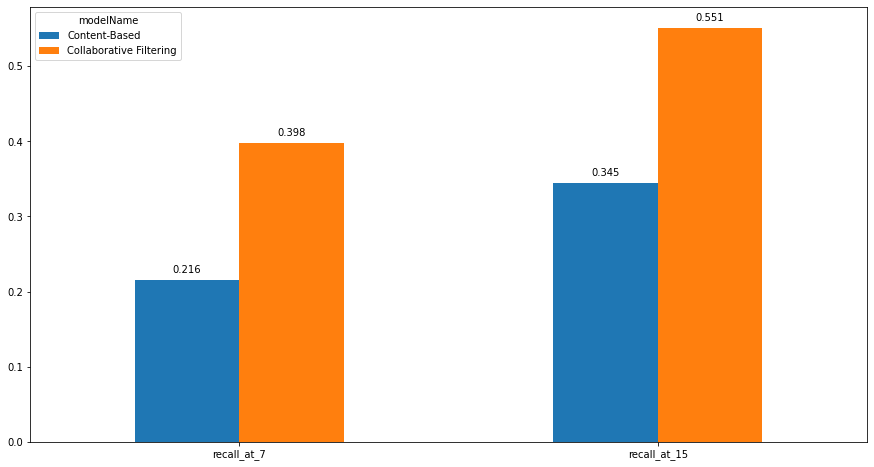

In [ ]:
%matplotlib inline
ax = global_metrics_df.transpose().plot(kind='bar', figsize=(15,8))
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=0)